# Assignment 4
Submission from Maria Kagkeli, Maria Regina Lily, Mihai Verzan

## Problem 4-1: Power Laws

In [1]:
import numpy as np

In [2]:
degs = [3, 1, 1, 3, 2, 1, 7, 3, 1, 1, 1, 12, 2, 1, 4, 1, 1, 8, 1, 1]
sum_val = 0
for i in degs:
    sum_val += np.log(i/0.5)
    
print("sum_val = {}".format(sum_val))

gamma = 1 + len(degs)*(1/(sum_val))
print("Gamma = {}".format(gamma))

sigma = (gamma-1)/(np.sqrt(20))
print("Sigma = {}".format(sigma))

sum_val = 26.441627539966156
Gamma = 1.756383092144017
Sigma = 0.16913240110655092


## Problem 4-3: Measuring Real Networks

In [3]:
import pandas as pd
import igraph as ig
import networkx as nx

In [4]:
#read and clean-up data
data = pd.read_csv("dev/facebook-links.txt.anon", sep="\t", header=None)
data = data.drop(axis = 1, columns = 2)
data.to_csv("facebook-links.txt", header=False, index=False, sep="\t")

In [5]:
#read clean-up data into an igraph graph and a networkx graph
G_ig = ig.Graph.Read_Edgelist("facebook-links.txt", directed=False)
G_nx = nx.read_edgelist("facebook-links.txt", delimiter="\t")

In [6]:
#make graph undirected and simple(no multiple edges)
G_ig = G_ig.simplify(multiple="False", loops="False")
G_nx = G_nx.to_undirected()

### 1. Diameter of graph

In [7]:
largest_comps = G_ig.largest_cliques()
# largest_comps returns two different largest connected components

comp = G_ig.subgraph(largest_comps[0])
diam = comp.diameter()
print("Diameter of largest_component 1 = {}".format(diam))
comp = G_ig.subgraph(largest_comps[1])
diam = comp.diameter()
print("Diameter of largest_component 2 = {}".format(diam))

# if you put these two componenets together and calculate the diameter:
comp = G_ig.subgraph(largest_comps[0]+largest_comps[1])
diam = comp.diameter()
print("Diameter of largest_components 1 and 2  = {}".format(diam))

Diameter of largest_component 1 = 1
Diameter of largest_component 2 = 1
Diameter of largest_components 1 and 2  = 2


### 2. ID and degree of node with highest degree

In [8]:
max_deg = G_ig.maxdegree()
max_node =  G_ig.vs.find(_degree = max_deg).index
print("Node ID = {},\t Degree = {}". format(max_node, max_deg))

Node ID = 2332,	 Degree = 1098


### 3. Number of triangles in the graph

In [9]:
#We could not figure how to do this with igraph, so we did this with networkx
triangles_dict = nx.triangles(G_nx)
triangles_count = sum(triangles_dict.values())/3
print("Number of triangles = {}".format(triangles_count))

Number of triangles = 3501542.0


### 4. Average local clustering coefficient

In [10]:
avg_cc = G_ig.transitivity_avglocal_undirected(mode="zero")
print("Average local clustering coefficient = {}".format(avg_cc))

Average local clustering coefficient = 0.22099020936535468


### 5. Power law fitting

In [11]:
'''
We used the python package that was linked from the website given in the homework,
which can be found here: https://pypi.org/project/powerlaw/
'''
import powerlaw as pl

degs = sorted(G_ig.degree())
fit = pl.Fit(degs, discrete=True, xmin=0)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
C:\Users\Lily\Anaconda3\lib\site-packages\powerlaw-1.4.5-py3.6.egg\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\Lily\Anaconda3\lib\site-packages\powerlaw-1.4.5-py3.6.egg\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


### 6. Degree Distribution

In [12]:
import matplotlib.pyplot as plt
import collections

#find the degree distribution of original data set
degs_count = collections.Counter(degs)
deg, cnt = zip(*degs_count.items())
cnt = np.array(cnt)/len(degs)

C:\Users\Lily\Anaconda3\lib\site-packages\powerlaw-1.4.5-py3.6.egg\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


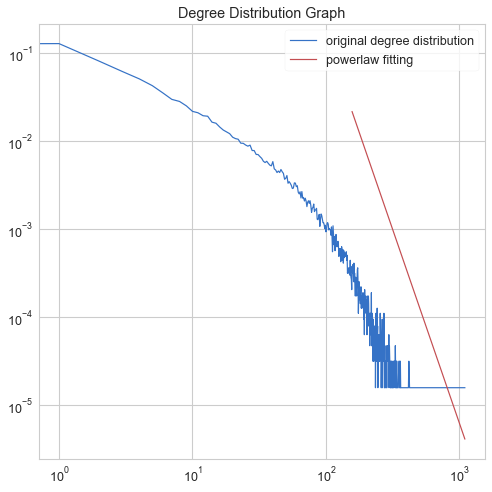

In [14]:
fig, ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.xscale("log")

plt.plot(deg, cnt, color='b')
fit.power_law.plot_pdf(ax=ax, color='r')

plt.legend(["original degree distribution", "powerlaw fitting"])
plt.title("Degree Distribution Graph")
plt.show()
